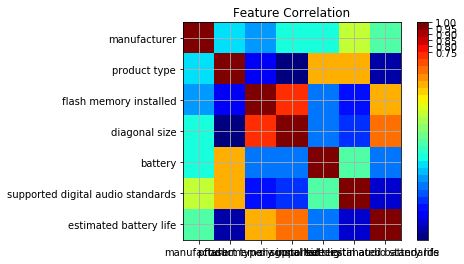

,level_0,level_1,0
7,product type,diagonal size,-0.438560
10,product type,estimated battery life,-0.345635
20,supported digital audio standards,estimated battery life,-0.298562
6,product type,flash memory installed,-0.228539
13,flash memory installed,supported digital audio standards,-0.160970
0,manufacturer,product type,-0.124019
16,diagonal size,supported digital audio standards,-0.116767
19,battery,estimated battery life,-0.080152
1,manufacturer,flash memory installed,-0.069774
12,flash memory installed,battery,-0.030596


In [22]:

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# this function visualize relations between features
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=['','manufacturer', 'product type',
       'flash memory installed', 'diagonal size', 'battery',
       'supported digital audio standards', 'estimated battery life']
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()
    

#load files
train = pd.read_csv('output.tsv', sep ="\t")
#remove empty columns - because of extra tab
train = train.loc[:,~(train.columns.str.contains('Unnamed'))]
train.columns=[ 'manufacturer', 'product type', 'digital storage',
        'flash memory installed', 'diagonal size', 'battery',
        'supported digital audio standards', 'estimated battery life','nulll']
train = train.loc[:,train.columns != 'digital storage']
train = train.loc[:,train.columns!='nulll']
train.to_csv('train0.csv', index=False)

#load csv file
train = pd.read_csv('train0.csv')

#fill Nan cells
train["manufacturer"] = train["manufacturer"].fillna('Nan')
train["product type"] = train["product type"].fillna('Nan')
train["battery"] = train["battery"].fillna('Nan')
train["supported digital audio standards"] = train["supported digital audio standards"].fillna('Nan')
train["flash memory installed"] = train["flash memory installed"].fillna('0')
train["diagonal size"] = train["diagonal size"].fillna('0')
train["estimated battery life"] = train["estimated battery life"].fillna('0')

#categorize manufacturer, product type, battery, supported digital audio standards
le = LabelEncoder()
train["manufacturer"] = le.fit_transform(train["manufacturer"])
train["product type"] = le.fit_transform(train["product type"])
train["battery"] = le.fit_transform(train["battery"])
train["supported digital audio standards"] = le.fit_transform(train["supported digital audio standards"])

# text to numeric for "flash memory installed" , "diagonal size" ,"estimated battery life"
#str1=train[train['flash memory installed'].str.contains('GB',na=False)]["flash memory installed"]
str1 = train["flash memory installed"]
x=[]
for s in str1:
    if(any(char.isdigit() for char in s) and s.split()[0].isdigit()):
        if('MB' in s):
            x.append(float(s.split()[0])/1000)# Mega Byte = Giga Byte/1000
        else:
            x.append(float(s.split()[0]))
    else:
        x.append(0)
    #print(x)
train["flash memory installed"] = x

str1 = train["diagonal size"]
x=[]
for s in str1:
    x.append(float(s.split()[0]))
    
train["diagonal size"] = x

str1 = train["estimated battery life"]
x=[]
for s in str1:
    if(s.split()[0] == '153,'):# one cell is "153," and dont become float 
        x.append(153)
    else:
        x.append(float(s.split()[0]))
train["estimated battery life"] = x
        
#save numeric data
train.to_csv('train1.csv', index=False)
        
# calculate pearson correlation between features
c=train.corr(method='pearson')
correlation_matrix(c)

# sort feature relations based on pearson correlation between them
corrs=train.corr(method='pearson').where(pd.np.triu(pd.np.ones(7), k=1).astype(bool)).stack().reset_index()
corrs.sort_values(0)





In [21]:
# sort feature relations based on pearson correlation between them
corrs=train.corr(method='pearson').where(pd.np.triu(pd.np.ones(7), k=1).astype(bool)).stack().reset_index()
corrs.sort_values(0)

,level_0,level_1,0
7,product type,diagonal size,-0.438560
10,product type,estimated battery life,-0.345635
20,supported digital audio standards,estimated battery life,-0.298562
6,product type,flash memory installed,-0.228539
13,flash memory installed,supported digital audio standards,-0.160970
0,manufacturer,product type,-0.124019
16,diagonal size,supported digital audio standards,-0.116767
19,battery,estimated battery life,-0.080152
1,manufacturer,flash memory installed,-0.069774
12,flash memory installed,battery,-0.030596
